In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clients = pd.read_csv('../data/Clients.csv', delimiter=';', encoding='latin1')
commandes = pd.read_csv('../data/Commandes.csv', delimiter=';', encoding='latin1')
envois_chunks = pd.read_csv('../data/Envois.csv', delimiter=';', encoding='latin1', chunksize=500000)
envois = envois_chunks.get_chunk()
produits = pd.read_csv('../data/Produits.csv', delimiter=';', encoding='latin1')
commandes = commandes.rename(columns={'Id_produit': 'id_produit'})

In [2]:
dummies1=pd.get_dummies(clients["ZoneGeographique"],prefix="Zone")
dummies2=pd.get_dummies(clients["Segmentation"],prefix="Segmentation")
dummies2=pd.get_dummies(clients["Civilite"],prefix="Civilite_")
to_drop=["ZoneGeographique","Segmentation","Civilite"]


,Zone_IDF (hors Paris),Zone_Paris,Zone_Province Urbaine,Zone_Province non Urbaine
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
499995,False,False,False,False
499996,False,False,False,True
499997,False,False,True,False
499998,False,False,False,True


In [44]:
commandes_produits=pd.merge(commandes,produits,on='id_produit',how='inner')

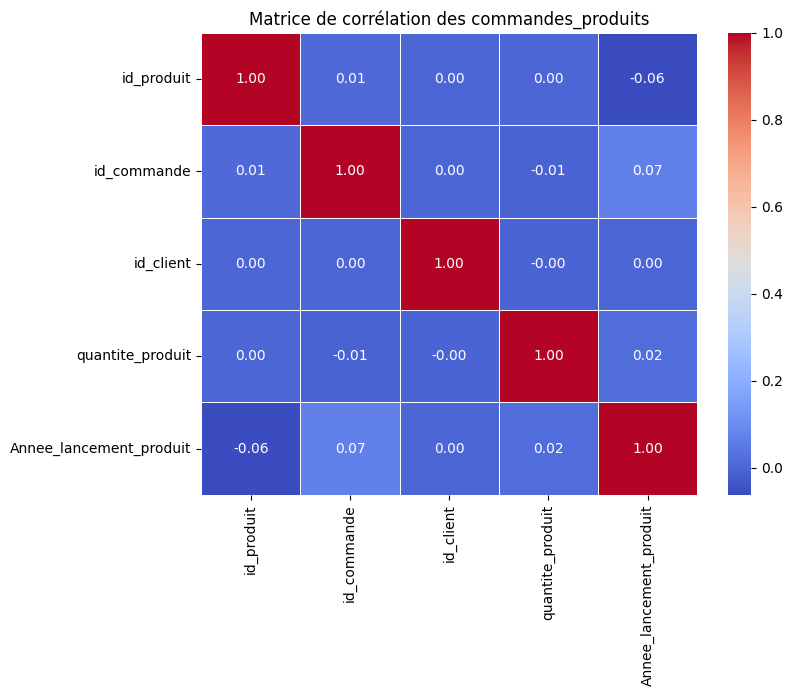

In [45]:
# Excluez les colonnes non numériques
correlation_commandes = commandes_produits.select_dtypes(include=['float64', 'int64']).corr()

# Visualisez la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_commandes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des commandes_produits')
plt.show()


In [46]:
clients_commandes=pd.merge(clients,commandes,on='id_client',how='inner')

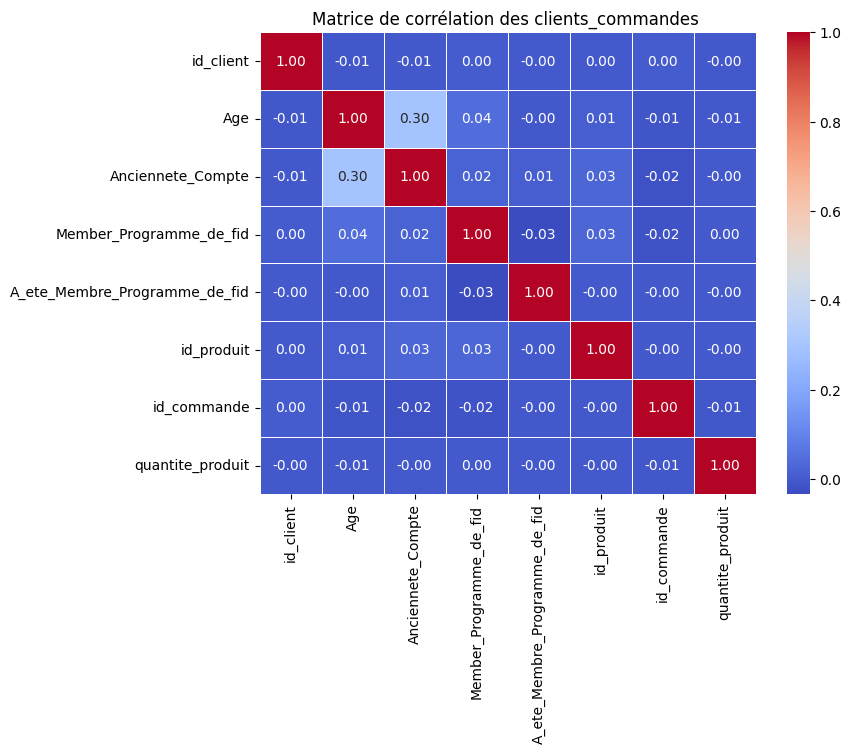

In [47]:
# Excluez les colonnes non numériques
correlation_commandes = clients_commandes.select_dtypes(include=['float64', 'int64']).corr()

# Visualisez la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_commandes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des clients_commandes ')
plt.show()


In [51]:
clients["id_client"].value_counts()

id_client
200806    1
47865     1
459319    1
217536    1
194163    1
         ..
239210    1
468642    1
219382    1
371694    1
130263    1
Name: count, Length: 500000, dtype: int64

In [52]:
clients_envois_commandes = pd.merge(pd.merge(clients, envois, on="id_client"), commandes, on="id_client")


In [60]:
pd.set_option("display.max_columns",50)

clients_envois_commandes.head()

,id_client,Host,Civilite,Pays,Age,Anciennete_Compte,ZoneGeographique,Segmentation,dPremierEnvoi,dPremiereCommande,Member_Programme_de_fid,A_ete_Membre_Programme_de_fid,Id_Envoi,id_campagne,type_campagne,sous_type_campagne,dEnvoi,nbrOuverture,dPremiereOuverture,dDerniereOuverture,nbrClic,dPremierClic,dDernierClic,estDesabonne,dDesabonement,id_produit,id_commande,quantite_produit,Canal_Commande,dCommande,Montant_Produit,Montant_Remise
0,200806,gmail.com,Madame,France,69.0,8,Province Urbaine,Actifs - 12 mois Gros,2015-06-05 12:31:37,2015-02-28 10:57:42,1,0,10771398,1905,Email tactique,Email promotionnel,2020-09-23 09:11:37.597000000,1.0,2020-09-23 11:22:55.827000000,2020-09-23 11:22:55.827000000,NaN,NaN,NaN,0,NaN,22739,353519,1,Boutique,2021-09-28 17:20:13,"83,125000",",00000000000000000"
1,200806,gmail.com,Madame,France,69.0,8,Province Urbaine,Actifs - 12 mois Gros,2015-06-05 12:31:37,2015-02-28 10:57:42,1,0,10771398,1905,Email tactique,Email promotionnel,2020-09-23 09:11:37.597000000,1.0,2020-09-23 11:22:55.827000000,2020-09-23 11:22:55.827000000,NaN,NaN,NaN,0,NaN,9077,28233,1,Boutique,2021-11-18 10:24:14,"73,000000","14,60000000000000000"
2,200806,gmail.com,Madame,France,69.0,8,Province Urbaine,Actifs - 12 mois Gros,2015-06-05 12:31:37,2015-02-28 10:57:42,1,0,10771398,1905,Email tactique,Email promotionnel,2020-09-23 09:11:37.597000000,1.0,2020-09-23 11:22:55.827000000,2020-09-23 11:22:55.827000000,NaN,NaN,NaN,0,NaN,31023,28233,1,Boutique,2021-11-18 10:24:14,"78,750000","15,75000000000000000"
3,200806,gmail.com,Madame,France,69.0,8,Province Urbaine,Actifs - 12 mois Gros,2015-06-05 12:31:37,2015-02-28 10:57:42,1,0,10771398,1905,Email tactique,Email promotionnel,2020-09-23 09:11:37.597000000,1.0,2020-09-23 11:22:55.827000000,2020-09-23 11:22:55.827000000,NaN,NaN,NaN,0,NaN,10174,28233,1,Boutique,2021-11-18 10:24:14,"118,125000","23,62500000000000000"
4,200806,gmail.com,Madame,France,69.0,8,Province Urbaine,Actifs - 12 mois Gros,2015-06-05 12:31:37,2015-02-28 10:57:42,1,0,10771398,1905,Email tactique,Email promotionnel,2020-09-23 09:11:37.597000000,1.0,2020-09-23 11:22:55.827000000,2020-09-23 11:22:55.827000000,NaN,NaN,NaN,0,NaN,21040,28233,1,Boutique,2021-11-18 10:24:14,"140,000000","28,00000000000000000"


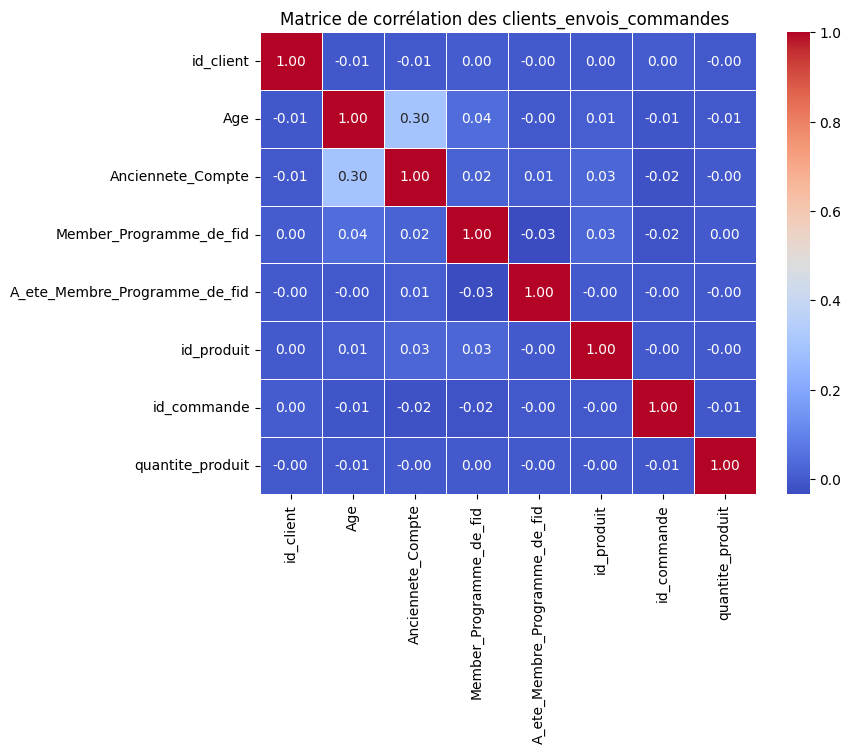

In [53]:
# Excluez les colonnes non numériques
correlation_clients_envois_commandes= clients_envois_commandes.select_dtypes(include=['float64', 'int64']).corr()

# Visualisez la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_commandes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des clients_envois_commandes ')
plt.show()
